<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#obtendo os arquivos de dados
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

--2022-03-26 09:45:30--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1397869 (1.3M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   1.33M  --.-KB/s    in 0.04s   

2022-03-26 09:45:31 (31.7 MB/s) - ‘train.csv’ saved [1397869/1397869]

--2022-03-26 09:45:31--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573899 (560K) [text/pla

In [4]:
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [5]:
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X = dfTrain[preditoras].values
y = dfTrain['score'].values
y = np.log(y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# feature selection
def select_features(X_treino, y_treino, X_teste):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from treinoing data
	fs.fit(X_treino, y_treino)
	# transform treino input data
	X_treino_fs = fs.transform(X_treino)
	# transform teste input data
	X_teste_fs = fs.transform(X_teste)
	return X_treino_fs, X_teste_fs, fs


Feature 0: 0.067010
Feature 1: 0.098524
Feature 2: 0.065847
Feature 3: 0.056533
Feature 4: 0.065395
Feature 5: 0.113283
Feature 6: 0.086543
Feature 7: 0.096140
Feature 8: 0.110191
Feature 9: 0.110829
Feature 10: 0.095782
Feature 11: 0.068429
Feature 12: 0.107365
Feature 13: 0.083306
Feature 14: 0.212935
Feature 15: 0.083207
Feature 16: 0.011850
Feature 17: 0.006747
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.018647
Feature 21: 0.004002
Feature 22: 0.000000
Feature 23: 0.013150
Feature 24: 0.001960
Feature 25: 0.017762
Feature 26: 0.000000


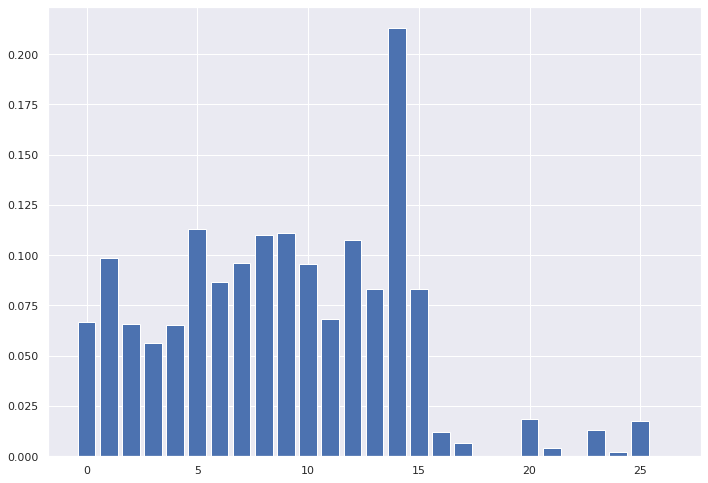

In [7]:
# feature selection
X_treino_fs, X_teste_fs, fs = select_features(X_treino, y_treino, X_teste)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [8]:
#np.argmax(fs.scores_)
importantes = np.argpartition(fs.scores_, -4)[-10:]
n_preditoras = [preditoras[i]  for i in importantes if preditoras[i] not in ['V8','V13','V10','V9']]
X = dfTrain[n_preditoras].values



In [9]:
def imprimeBoxPlot(dfTrain, n_preditoras, title=None):
  fig, ax =plt.subplots(2,3, figsize=(12, 8))#, sharex=True
  for i, c in enumerate(n_preditoras):
    j = 0 if i<=2 else 1
    k = i if i<=2 else i-3
    data = dfTrain[[c]]
    sns.boxplot(data=data, orient='h', ax=ax[j,k]).set_title(c + " - " + title)

In [10]:
#filtrando outliers
dados = dfTrain.copy()
for c in n_preditoras:
  # selecionando segundo o total
  Q1 = dados[c].quantile(0.25)
  Q3 = dados[c].quantile(0.75)
  IQR = Q3 - Q1
  dados = dados[(dados[c] >= Q1 - (IQR*1.5)) & (dados[c] <= Q3 + (IQR*1.5))]
  

In [14]:
#correlação
display(dados[n_preditoras].corr('pearson'))
display(dados[n_preditoras].corr('spearman'))

,V16,V4,V15,V11,V12,V17
V16,1.000000,0.542183,-0.572807,0.352248,0.396394,0.154511
V4,0.542183,1.000000,-0.656834,0.472764,0.503625,0.465904
V15,-0.572807,-0.656834,1.000000,-0.713264,-0.701938,-0.341391
V11,0.352248,0.472764,-0.713264,1.000000,0.936071,0.243988
V12,0.396394,0.503625,-0.701938,0.936071,1.000000,0.269343
V17,0.154511,0.465904,-0.341391,0.243988,0.269343,1.000000


,V16,V4,V15,V11,V12,V17
V16,1.000000,0.562637,-0.569947,0.353742,0.413152,0.156970
V4,0.562637,1.000000,-0.694983,0.524153,0.557201,0.491052
V15,-0.569947,-0.694983,1.000000,-0.738135,-0.732553,-0.340880
V11,0.353742,0.524153,-0.738135,1.000000,0.948056,0.262701
V12,0.413152,0.557201,-0.732553,0.948056,1.000000,0.281695
V17,0.156970,0.491052,-0.340880,0.262701,0.281695,1.000000


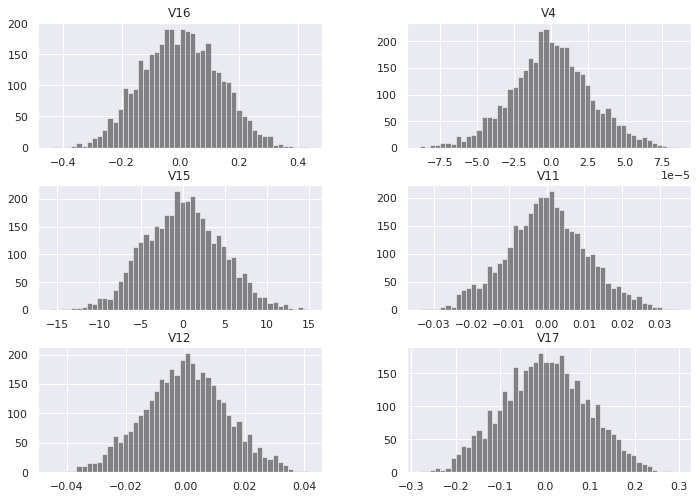

In [17]:
dados[n_preditoras].diff().hist(color="k", alpha=0.5, bins=50);

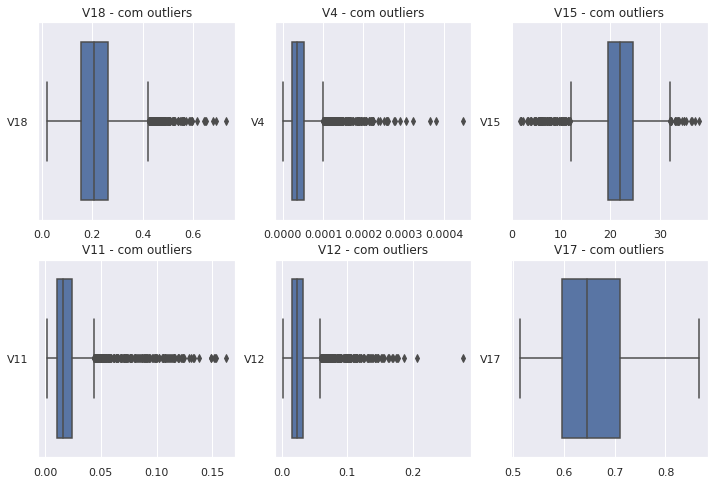

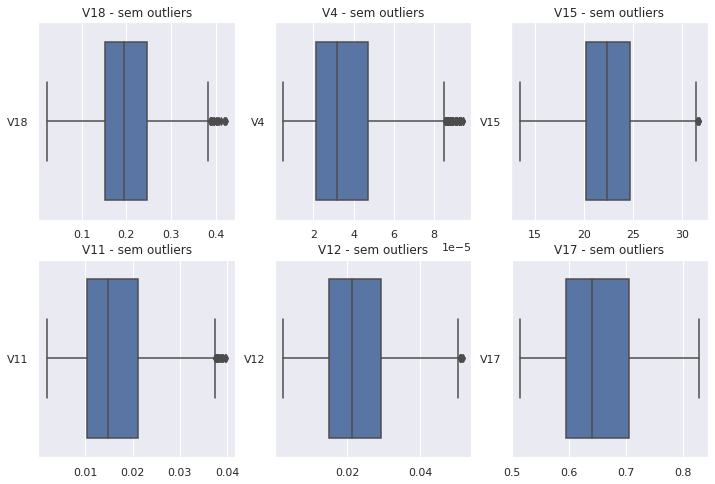

In [ ]:
#box plot antes dos outliers
imprimeBoxPlot(dfTrain, n_preditoras, 'com outliers')
#box plot sem os outliers
imprimeBoxPlot(dados, n_preditoras, 'sem outliers')

In [ ]:
#Ajusta o modelo de regressão linear múltipla para o score

modelo = ols('score ~ ' + ' + '.join(n_preditoras) ,data=dfTrain)

res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     68.04
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           5.06e-81
Time:                        23:14:32   Log-Likelihood:                -15517.
No. Observations:                4141   AIC:                         3.105e+04
Df Residuals:                    4134   BIC:                         3.109e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.4112      2.760     22.975      0.0

In [ ]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#scaled_features = StandardScaler().fit_transform(dados)
#scaled_features = MinMaxScaler().fit_transform(dados)
#dados = pd.DataFrame(scaled_features, columns=dados.columns)

In [ ]:
modelo = ols('score ~ ' + ' + '.join(n_preditoras) ,data=dados)

res = modelo.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     74.65
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           3.99e-88
Time:                        23:37:51   Log-Likelihood:                -13625.
No. Observations:                3628   AIC:                         2.726e+04
Df Residuals:                    3621   BIC:                         2.731e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.9646      3.262     20.224      0.0